In [11]:
import pandas as pd
import numpy as np

## Лабораторная работа №3: Классификация $kNN$ Выполнил 6132 Павлов Алексей
Бинарная классификация <br>
https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

In [91]:
df = pd.read_csv('mushroom_cleaned.csv')

Набор представляет собой набор данных грибов для двоичной классификации. Цель - определить ядовитый ли гриб
   - Cap Diameter
   - Cap Shape
   - Gill Attachment
   - Gill Color
   - Stem Height
   - Stem Width
   - Stem Color
   - Season
   - Target Class - Is it edible or not?

In [13]:
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

k = 5
df = df.dropna()

X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=52)

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\
Precision: {precision_score(y_test, y_pred)}\n\
Recall: {recall_score(y_test, y_pred)}\n\
F-measure: {f1_score(y_test, y_pred)}\n\
Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.7120384935689831
Precision: 0.7429890560875513
Recall: 0.7297615048706751
F-measure: 0.7363158786646331
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      9706
           1       0.74      0.73      0.74     11908

    accuracy                           0.71     21614
   macro avg       0.71      0.71      0.71     21614
weighted avg       0.71      0.71      0.71     21614



   - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\
Precision: {precision_score(y_test, y_pred)}\n\
Recall: {recall_score(y_test, y_pred)}\n\
F-measure: {f1_score(y_test, y_pred)}\n\
Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.9876006292218007
Precision: 0.9864593781344032
Recall: 0.9910984212294256
F-measure: 0.9887734584450402
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      9706
           1       0.99      0.99      0.99     11908

    accuracy                           0.99     21614
   macro avg       0.99      0.99      0.99     21614
weighted avg       0.99      0.99      0.99     21614



Сравнить метрики на данных без нормализации и с применением нормализации.

| Было                          |        |          |         |       |
|-------------------------------|--------|----------|---------|-------|
| Accuracy: 0.7120384935689831  |        |          |         |       |
| Precision: 0.7429890560875513 |        |          |         |       |
| Recall: 0.7297615048706751    |        |          |         |       |
| F-measure: 0.7363158786646331 |        |          |         |       |
| Classification Report:        |        |          |         |       |
| precision                     | recall | f1-score | support |       |
| 0                             | 0.68   | 0.69     | 0.68    | 9706  |
| 1                             | 0.74   | 0.73     | 0.74    | 11908 |
| accuracy                      |        |          | 0.71    | 21614 |
| macro avg                     | 0.71   | 0.71     | 0.71    | 21614 |
| weighted avg                  | 0.71   | 0.71     | 0.71    | 21614 |
---
| Стало                         |        |          |         |       |
|-------------------------------|--------|----------|---------|-------|
| Accuracy: 0.9876006292218007  |        |          |         |       |
| Precision: 0.9864593781344032 |        |          |         |       |
| Recall: 0.9910984212294256    |        |          |         |       |
| F-measure: 0.9887734584450402 |        |          |         |       |
| Classification Report:        |        |          |         |       |
| precision                     | recall | f1-score | support |       |
| 0                             | 0.99   | 0.98     | 0.99    | 9706  |
| 1                             | 0.99   | 0.99     | 0.99    | 11908 |
| accuracy                      |        |          | 0.99    | 21614 |
| macro avg                     | 0.99   | 0.99     | 0.99    | 21614 |
| weighted avg                  | 0.99   | 0.99     | 0.99    | 21614 |

Вывод: нормализация увеличила значения точности

Построить `сorrelation heatmap`

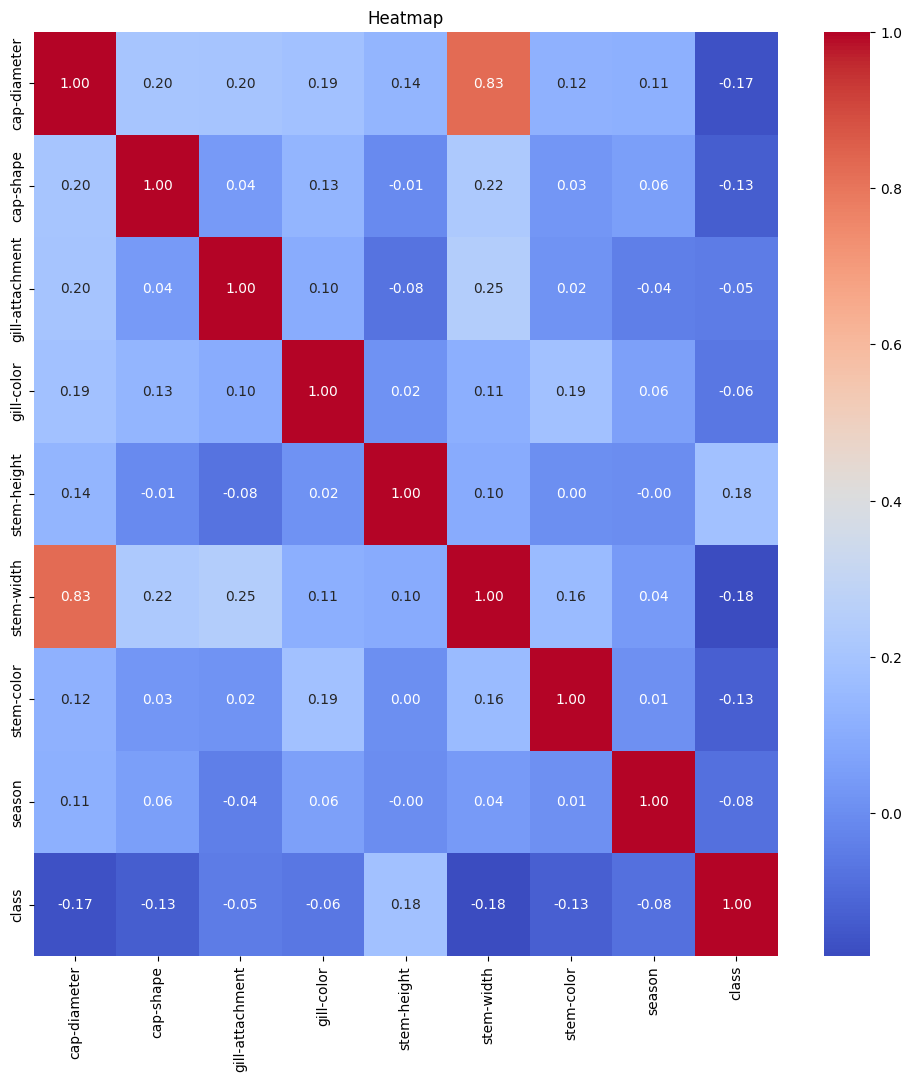

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

   - Осуществить бинарную классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.


In [95]:
corr_matrix = df.corr()

T_corr = 0.1
filtered_features = corr_matrix['class'][abs(corr_matrix['class']) > T_corr].index
filtered_features = filtered_features.drop('class')
filtered_features

Index(['cap-diameter', 'cap-shape', 'stem-height', 'stem-width', 'stem-color'], dtype='object')

In [96]:
X_filtered = df[filtered_features]
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y, test_size=0.4, random_state=52)

X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
X_test_filtered_scaled = scaler.transform(X_test_filtered)

knn.fit(X_train_filtered_scaled, y_train_filtered)
y_pred_filtered = knn.predict(X_test_filtered_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_filtered)}\n\
Precision: {precision_score(y_test, y_pred_filtered)}\n\
Recall: {recall_score(y_test, y_pred_filtered)}\n\
F-measure: {f1_score(y_test, y_pred_filtered)}\n\
Classification Report:\n {classification_report(y_test, y_pred_filtered)}")

Accuracy: 0.9129730730082354
Precision: 0.9212671204100495
Recall: 0.92072556264696
F-measure: 0.9209962619177623
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      9706
           1       0.92      0.92      0.92     11908

    accuracy                           0.91     21614
   macro avg       0.91      0.91      0.91     21614
weighted avg       0.91      0.91      0.91     21614



Сравнить метрики до и после фильтрации.

| Стало                         |        |          |         |       |
|-------------------------------|--------|----------|---------|-------|
| Accuracy: 0.9876006292218007  |        |          |         |       |
| Precision: 0.9864593781344032 |        |          |         |       |
| Recall: 0.9910984212294256    |        |          |         |       |
| F-measure: 0.9887734584450402 |        |          |         |       |
| Classification Report:        |        |          |         |       |
| precision                     | recall | f1-score | support |       |
| 0                             | 0.99   | 0.98     | 0.99    | 9706  |
| 1                             | 0.99   | 0.99     | 0.99    | 11908 |
| accuracy                      |        |          | 0.99    | 21614 |
| macro avg                     | 0.99   | 0.99     | 0.99    | 21614 |
| weighted avg                  | 0.99   | 0.99     | 0.99    | 21614 |
---
| Стало                         |        |          |         |       |
|-------------------------------|--------|----------|---------|-------|
| Accuracy: 0.9129730730082354  |        |          |         |       |
| Precision: 0.9212671204100495 |        |          |         |       |
| Recall: 0.92072556264696      |        |          |         |       |
| F-measure: 0.9209962619177623 |        |          |         |       |
| Classification Report:        | recall | f1-score | support |       |
| precision                     | recall | f1-score | support | 9706  |
| 0                             | 0.90   | 0.90     | 0.90    | 9706  |
| 1                             | 0.92   | 0.92     | 0.92    | 11908 |
| accuracy                      |        |          | 0.91    | 21614 |
| macro avg                     | 0.91   | 0.91     | 0.91    | 21614 |
| weighted avg                  | 0.91   | 0.91     | 0.91    | 21614 |

Вывод: в данном датасете срезанные признаки важны, без них метрики уменьшаются

Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных

In [98]:
from sklearn.model_selection import GridSearchCV, cross_val_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)
param_grid = {'n_neighbors': range(1, 15)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, scoring='accuracy')

In [99]:
best_k = grid_search.best_params_['n_neighbors']
print(f"Лучшее значение k: {best_k}")

Лучшее значение k: 4


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=52)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\
Precision: {precision_score(y_test, y_pred)}\n\
Recall: {recall_score(y_test, y_pred)}\n\
F-measure: {f1_score(y_test, y_pred)}\n\
Classification:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.910844822800037
Precision: 0.9439551641313051
Recall: 0.891081625797783
F-measure: 0.9167566633547887
Classification:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      9706
           1       0.94      0.89      0.92     11908

    accuracy                           0.91     21614
   macro avg       0.91      0.91      0.91     21614
weighted avg       0.91      0.91      0.91     21614



Построить график train/test accuracy в зависимости от значения k.

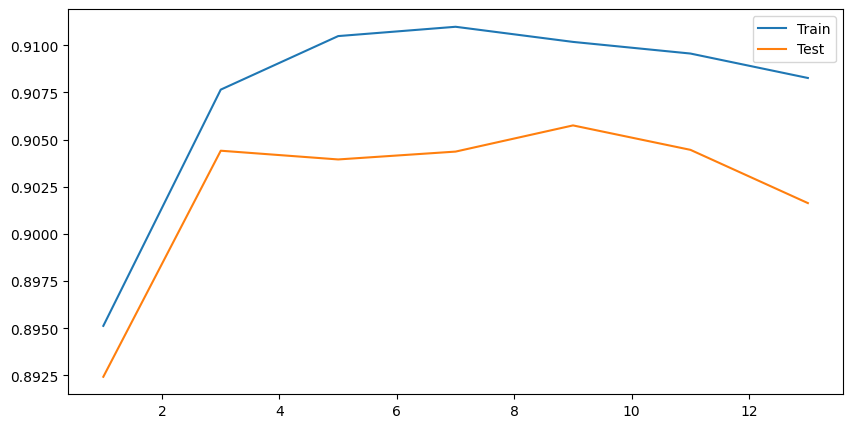

In [23]:
train_scores, test_scores = [], []

for k in range(1, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores.append(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean())
    test_scores.append(cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean())

plt.figure(figsize=(10, 5))
plt.plot(range(1, 15, 2), train_scores, label='Train')
plt.plot(range(1, 15, 2), test_scores, label='Test')
plt.legend()
plt.show()

Небинарная (многоклассовая) классификация <br>
https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset

In [121]:
df2 = pd.read_csv('gaming.csv')
df2

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


Этот набор данных собирает комплексные показатели и демографические данные, связанные с поведением игроков в онлайн-игровой среде.

   - PlayerID: Unique identifier for each player.
   - Age: Age of the player.
   - Gender: Gender of the player.
   - Location: Geographic location of the player.
   - GameGenre: Genre of the game the player is engaged in.
   - PlayTimeHours: Average hours spent playing per session.
   - InGamePurchases: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
   - GameDifficulty: Difficulty level of the game.
   - SessionsPerWeek: Number of gaming sessions per week.
   - AvgSessionDurationMinutes: Average duration of each gaming session in minutes.
   - PlayerLevel: Current level of the player in the game.
   - AchievementsUnlocked: Number of achievements unlocked by the player.
   - EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').


In [122]:
df2 = pd.get_dummies(df2, columns=['Gender', 'Location', 'GameGenre', 'GameDifficulty'], drop_first= True)

Закодировать категориальные признаки при необходимости.

In [123]:
df2["EngagementLevel"] = df2["EngagementLevel"].replace({"Low": 0, "Medium": 1, "High": 2})
df2

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium
0,9000,43,16.271119,0,6,108,79,25,1,True,False,True,False,False,False,False,True,False,True
1,9001,29,5.525961,0,5,144,11,10,1,False,False,False,True,False,False,False,True,False,True
2,9002,22,8.223755,0,16,142,35,41,2,False,False,False,True,False,False,True,False,False,False
3,9003,35,5.265351,1,9,85,57,47,1,True,False,False,True,False,False,False,False,False,False
4,9004,33,15.531945,0,2,131,95,37,1,True,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,20.619662,0,4,75,85,14,1,True,False,False,True,False,False,False,True,False,False
40030,49030,44,13.539280,0,19,114,71,27,2,False,False,True,False,False,True,False,False,True,False
40031,49031,15,0.240057,1,10,176,29,1,2,False,False,False,True,True,False,False,False,False,False
40032,49032,34,14.017818,1,3,128,70,10,1,True,False,False,True,False,False,True,False,False,True


   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
   - Разбиение использовать одно и то же для данных без фильтрации признаков и с применением фильтрации.
   - Осуществить многоклассовую классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [124]:
df2 = df2.drop(columns=['PlayerID'])

In [125]:
k = 5

X = df2.drop(columns=['EngagementLevel'])
y = df2['EngagementLevel']

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=52)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\
Precision: {precision_score(y_test, y_pred, average='weighted')}\n\
Recall: {recall_score(y_test, y_pred, average='weighted')}\n\
F-measure: {f1_score(y_test, y_pred, average='weighted')}\n\
Classification:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.684088922193081
Precision: 0.6915536949951129
Recall: 0.684088922193081
F-measure: 0.6803279342297457
Classification:
               precision    recall  f1-score   support

           0       0.64      0.52      0.58      4143
           1       0.66      0.80      0.72      7761
           2       0.81      0.64      0.71      4110

    accuracy                           0.68     16014
   macro avg       0.70      0.65      0.67     16014
weighted avg       0.69      0.68      0.68     16014



Построить `сorrelation heatmap`

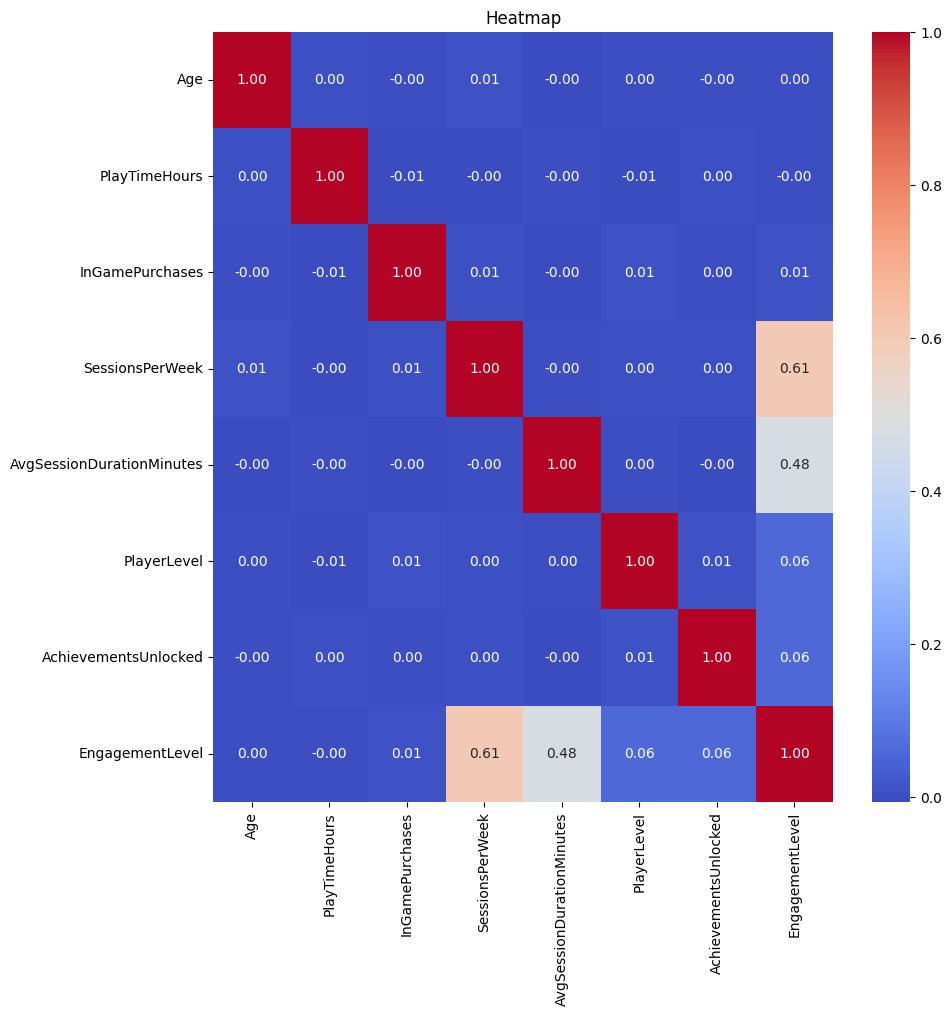

In [126]:
numeric_cols = df2.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

   - Осуществить многоклассовую классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [127]:
corr_matrix = df2.corr()

T_corr = 0.1
filtered_features = corr_matrix['EngagementLevel'][abs(corr_matrix['EngagementLevel']) > T_corr].index
filtered_features = filtered_features.drop('EngagementLevel')
filtered_features

Index(['SessionsPerWeek', 'AvgSessionDurationMinutes'], dtype='object')

In [128]:
X_filtered = df2[filtered_features]
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y, test_size=0.4, random_state=52)

X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
X_test_filtered_scaled = scaler.transform(X_test_filtered)

knn.fit(X_train_filtered_scaled, y_train_filtered)
y_pred_filtered = knn.predict(X_test_filtered_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_filtered)}\n\
Precision: {precision_score(y_test, y_pred_filtered, average='weighted')}\n\
Recall: {recall_score(y_test, y_pred_filtered, average='weighted')}\n\
F-measure: {f1_score(y_test, y_pred_filtered, average='weighted')}\n\
Classification Report:\n {classification_report(y_test, y_pred_filtered)}")

Accuracy: 0.8738603721743474
Precision: 0.8744058902376302
Recall: 0.8738603721743474
F-measure: 0.8738802511564263
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      4143
           1       0.88      0.90      0.89      7761
           2       0.91      0.86      0.89      4110

    accuracy                           0.87     16014
   macro avg       0.87      0.87      0.87     16014
weighted avg       0.87      0.87      0.87     16014



Сравнить метрики до и после фильтрации.

| Стало                         |        |          |         |       |
|-------------------------------|--------|----------|---------|-------|
| Accuracy: 0.684088922193081   |        |          |         |       |
| Precision: 0.6915536949951129 |        |          |         |       |
| Recall: 0.684088922193081     |        |          |         |       |
| F-measure: 0.6803279342297457 |        |          |         |       |
| Classification:               |        |          |         |       |
| precision                     | recall | f1-score | support |       |
| 0                             | 0.64   | 0.52     | 0.58    | 4143  |
| 1                             | 0.66   | 0.80     | 0.72    | 7761  |
| 2                             | 0.81   | 0.64     | 0.71    | 4110  |
| accuracy                      |        |          | 0.68    | 16014 |
| macro avg                     | 0.70   | 0.65     | 0.67    | 16014 |
| weighted avg                  | 0.69   | 0.68     | 0.68    | 16014 |
---
| Стало                         |        |          |         |       |
|-------------------------------|--------|----------|---------|-------|
| Accuracy: 0.8738603721743474  |        |          |         |       |
| Precision: 0.8744058902376302 |        |          |         |       |
| Recall: 0.8738603721743474    |        |          |         |       |
| F-measure: 0.8738802511564263 |        |          |         |       |
| Classification Report:        |        |          |         |       |
| precision                     | recall | f1-score | support |       |
| 0                             | 0.83   | 0.84     | 0.84    | 4143  |
| 1                             | 0.88   | 0.90     | 0.89    | 7761  |
| 2                             | 0.91   | 0.86     | 0.89    | 4110  |
| accuracy                      |        |          | 0.87    | 16014 |
| macro avg                     | 0.87   | 0.87     | 0.87    | 16014 |
| weighted avg                  | 0.87   | 0.87     | 0.87    | 16014 |

Вывод: в данном датасете фильтрация признаков улучшила показания метрик

Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных

In [130]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)
param_grid = {'n_neighbors': range(1, 15)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, scoring='accuracy')

In [131]:
best_k = grid_search.best_params_['n_neighbors']
print(f"Лучшее значение k: {best_k}")

Лучшее значение k: 12


Для лучшего классификатора привести метрики, `classification_report`, построить confusion matrix

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=52)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\
Precision: {precision_score(y_test, y_pred, average='weighted')}\n\
Recall: {recall_score(y_test, y_pred, average='weighted')}\n\
F-measure: {f1_score(y_test, y_pred, average='weighted')}\n\
Classification:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.8819782690146122
Precision: 0.8831369913067405
Recall: 0.8819782690146122
F-measure: 0.8821974373818002
Classification:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      4143
           1       0.89      0.90      0.90      7761
           2       0.92      0.86      0.89      4110

    accuracy                           0.88     16014
   macro avg       0.88      0.88      0.88     16014
weighted avg       0.88      0.88      0.88     16014



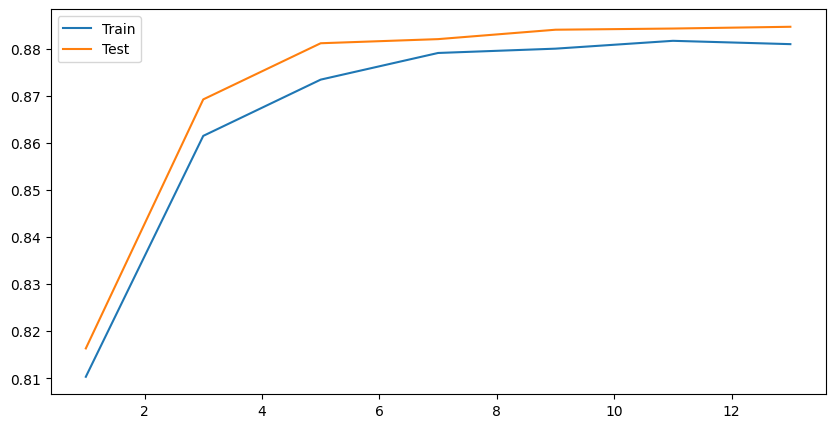

In [133]:
train_scores, test_scores = [], []

for k in range(1, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores.append(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean())
    test_scores.append(cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean())

plt.figure(figsize=(10, 5))
plt.plot(range(1, 15, 2), train_scores, label='Train')
plt.plot(range(1, 15, 2), test_scores, label='Test')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

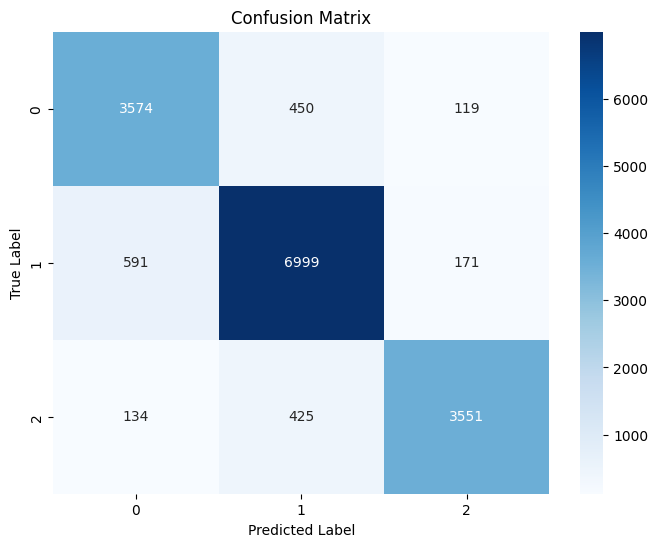

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()